생물정보학 및 실습 1
서울대학교 협동과정 생물정보학전공 2021년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부

## Mission 2

이번 미션에서는 start codon 주변에서 ribosome-protected fragment의 분포를 한 번 살펴보겠습니다. 보통은 RPF의 5'-end 분포가 start codon 앞 15nt 정도에서부터 본격적으로 많이 나오고, 거기서부터 CDS를 걸쳐서 3nt 주기로 올록볼록한 패턴이 나타납니다.

이 그림을 제대로 그리려면 genome coordinate를 start codon을 기준으로 변환해서 작업해야 하지만, 이번 미션에서는 난이도를 적절히 내리기 위해서 start codon이 포함된 exon에 존재하는 5' end만 추려서 작업하도록 합시다. (여유가 좀 있어서 난이도를 적당히 올리고 싶은 분들은 negative strand를 포함할 수도 있고, start codon과 다른 exon에 있는 경우를 포함할 수도 있습니다. 또한 APPRIS 등을 기반으로 해서 transcript 중에 가장 )

In [28]:
%pwd

'/qbio/yoojung/coursework/2021-1/bioinfo1/bioinfo-term-project/notebooks'

In [29]:
%cd ../../binfo1-datapack1/

/qbio/yoojung/coursework/2021-1/bioinfo1/binfo1-datapack1


In [30]:
!ls

CLIP-35L33G.bam				 gencode-start.gtf
CLIP-35L33G.bam.bai			 RNA-control.bam
CLIP-let7g.bam				 RNA-control.bam.bai
CLIP-let7g-gene.pileup			 RNA-siLin28a.bam
CLIP-let7g.pileup			 RNA-siLin28a.bam.bai
filtered-RPF-siLuc.bam			 RNA-siLuc.bam
fivepcounts-filtered-RPF-siLuc.txt	 RNA-siLuc.bam.bai
fivepcounts-RPF-siLuc.bed		 RPF-siLin28a.bam
gencode-exons-containing-startcodon.bed  RPF-siLin28a.bam.bai
gencode.gtf				 RPF-siLuc.bam
gencode-plusexon.gtf			 RPF-siLuc.bam.bai


우선 annotation에서 start codon이 포함된 exon만 추립니다. Gene 한 개에 isoform이 여러 개 있는 경우 모두 쓰면 read가 너무 부풀려질 수 있기 때문에 우선 transcript support level이 1인 것만 추려서 사용합니다. 여전히 TSL 1만 쓰더라도 부풀려질 가능성은 있기 때문에 제대로 하자면 APPRIS나 RNA-seq 데이터 기준으로 하나만 선정하는 것이 좋습니다만, 일단 여기서는 간단히..

그리고, - strand가 들어가면 좀 계산이 복잡해지니까 또 간단하게 하기 위해서 + strand만 고릅니다. 이번엔 일단 무조건 간단하게 해 봅시다~

In [5]:
!grep '	start_codon	.*	+	.*transcript_support_level "1"' gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-start.gtf
!head gencode-start.gtf

chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000134384.8
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000027036.11
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000150971.8
chr1	HAVANA	start_codon	4928137	4928139	.	+	0	ENSMUST00000081551.14
chr1	HAVANA	start_codon	5154674	5154676	.	+	0	ENSMUST00000044369.13
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000160777.8
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000027038.11
chr1	HAVANA	start_codon	6300227	6300229	.	+	0	ENSMUST00000027040.13
chr1	HAVANA	start_codon	6429555	6429557	.	+	0	ENSMUST00000133144.4
chr1	HAVANA	start_codon	6839122	6839124	.	+	0	ENSMUST00000140079.8


start codon가 들어가 있는 exon들을 고르기 위해서 미리 + strand에 있는 exon를 추립니다.. start codon 쪽에서 TSL 기준으로 골랐기 때문에 여기서는 고르지 않아도 됩니다. 물론 좀 느려지기는 하지만...

In [6]:
!grep '	exon	.*	+	' gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-plusexon.gtf
!head gencode-plusexon.gtf

chr1	HAVANA	exon	3143476	3144545	.	+	.	ENSMUST00000193812.2
chr1	ENSEMBL	exon	3172239	3172348	.	+	.	ENSMUST00000082908.3
chr1	HAVANA	exon	3322980	3323459	.	+	.	ENSMUST00000192857.2
chr1	HAVANA	exon	3536810	3536910	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3583628	3583776	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3602018	3602943	.	+	.	ENSMUST00000192183.2
chr1	HAVANA	exon	3750378	3752011	.	+	.	ENSMUST00000193244.2
chr1	HAVANA	exon	3822233	3824583	.	+	.	ENSMUST00000194454.2
chr1	HAVANA	exon	4566774	4569601	.	+	.	ENSMUST00000193450.2
chr1	HAVANA	exon	4567697	4567877	.	+	.	ENSMUST00000194935.2


그 다음엔 exon 리스트와 start codon 리스트를 겹치고, transcript가 같은 것만 살려둡니다. 기왕 좀 다루기 쉽도록 출력은 bed로 하면서 좌표계를 바꿉니다. 결과는 bedtools에서 빠르게 다룰 수 있게 sort해 둡니다.

In [7]:
!bedtools intersect -a gencode-start.gtf -b gencode-plusexon.gtf -wa -wb | \
 awk -F'	' -v OFS='	' '$9 == $18 { print $10, $13-1, $14, $18, $4-1, $16; }' | \
 sort -k1,1 -k2,3n -k4,4 > gencode-exons-containing-startcodon.bed
!head gencode-exons-containing-startcodon.bed; tail gencode-exons-containing-startcodon.bed

chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4928036	4928199	ENSMUST00000081551.14	4928136	+
chr1	5154639	5154786	ENSMUST00000044369.13	5154673	+
chr1	5659227	5659528	ENSMUST00000027038.11	5659271	+
chr1	5659257	5659528	ENSMUST00000160777.8	5659271	+
chr1	6300182	6300297	ENSMUST00000027040.13	6300226	+
chr1	6429441	6429738	ENSMUST00000133144.4	6429554	+
chr1	6839121	6839176	ENSMUST00000043578.13	6839121	+
chrY	80939672	80939804	ENSMUST00000185340.2	80939686	+
chrY	81470683	81470815	ENSMUST00000187135.2	81470697	+
chrY	82237903	82238035	ENSMUST00000185636.2	82237917	+
chrY	83043623	83043755	ENSMUST00000187165.2	83043637	+
chrY	84109956	84110088	ENSMUST00000185776.7	84109970	+
chrY	84759361	84759493	ENSMUST00000186110.2	84759375	+
chrY	86074448	86074580	ENSMUST00000188754.2	86074462	+
chrY	87129500	87129632	ENSMUST00000189543.7	87129514	+
chrY	87563647	87563779	ENSMUST0000

컬럼 4번에 transcript id, 5번에 start codon 위치를 넣었는데, start codon이 같은 것들이 여러개 눈에 띕니다. 아주 찝찝하지만, 우선 이번은 간단하게 할 것이기 때문에 눈을 질끈 감고 넘어가 봅시다.

이제 alignment를 준비합니다. + strand alignment에서 read length가 짧은 것도 미리 필터링 합니다. RPF는 보통 25nt 이상이기 때문에 그 이하는 거의 확실히 rRNA, tRNA 등에서 오염된 것들입니다. SAM 파일 전체를 필터링해서 다시 인코딩하기 때문에 시간이 좀 걸립니다.

In [9]:
!(samtools view -H RPF-siLuc.bam; \
  samtools view -F20 RPF-siLuc.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o filtered-RPF-siLuc.bam

In [31]:
!(samtools view -H RPF-siLin28a.bam; \
  samtools view -F20 RPF-siLin28a.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o filtered-RPF-siLin28a.bam

큰 일을 했으니 용량을 한 번 봅니다.

In [10]:
!ls -al *RPF-siLuc.bam

-rw-r--r-- 1 yoojung qbio  578280809 May 19 15:56 filtered-RPF-siLuc.bam
-rw-r--r-- 1 yoojung qbio 1055123479 May  6 18:02 RPF-siLuc.bam


In [32]:
!ls -al *RPF-siLin28a.bam

-rw-r--r-- 1 yoojung qbio 409734417 Jun  6 15:01 filtered-RPF-siLin28a.bam
-rw-r--r-- 1 yoojung qbio 737352902 May  6 18:04 RPF-siLin28a.bam


자 이제 read의 5' end 위치를 셉니다. bedtools의 `genomecov`를 쓰면 아주 편리합니다.

In [11]:
!bedtools genomecov -ibam filtered-RPF-siLuc.bam -bg -5 > fivepcounts-RPF-siLuc.bed
!head fivepcounts-RPF-siLuc.bed

chr1	3176534	3176535	1
chr1	3196256	3196257	1
chr1	3221526	3221527	1
chr1	3221542	3221543	2
chr1	3221545	3221546	3
chr1	3221546	3221547	2
chr1	3221548	3221550	1
chr1	3221571	3221572	1
chr1	3221897	3221898	1
chr1	3221994	3221995	1


In [33]:
!bedtools genomecov -ibam filtered-RPF-siLin28a.bam -bg -5 > fivepcounts-RPF-siLin28a.bed
!head fivepcounts-RPF-siLin28a.bed

chr1	3123359	3123360	1
chr1	3124284	3124285	1
chr1	3188296	3188297	1
chr1	3221546	3221547	1
chr1	3221549	3221550	2
chr1	3221868	3221869	1
chr1	3222153	3222154	1
chr1	3222413	3222415	1
chr1	3222638	3222639	1
chr1	3224556	3224557	1


그렇게 match 된 것들 중에 앞에서 찾은 start codon을 포함한 exon과 겹치는 것만 골라냅니다.

In [12]:
!bedtools intersect -a fivepcounts-RPF-siLuc.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLuc.txt
!head fivepcounts-filtered-RPF-siLuc.txt

chr1	4878048	4878049	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878048	4878049	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878077	4878078	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878101	4878102	4	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878101	4878102	4	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878101	4878102	4	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878103	4878104	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878103	4878104	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+


In [34]:
!bedtools intersect -a fivepcounts-RPF-siLin28a.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLin28a.txt
!head fivepcounts-filtered-RPF-siLin28a.txt

chr1	4878043	4878044	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878056	4878057	3	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878056	4878057	3	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878056	4878057	3	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878074	4878075	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878074	4878075	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878074	4878075	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878089	4878090	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878089	4878090	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878089	4878090	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+


In [13]:
%cp fivepcounts-filtered-RPF-siLuc.txt ../bioinfo-term-project/data/fivepcounts-filtered-RPF-siLuc.txt

In [35]:
%cp fivepcounts-filtered-RPF-siLin28a.txt ../bioinfo-term-project/data/fivepcounts-filtered-RPF-siLin28a.txt

In [36]:
%cd ../bioinfo-term-project/notebooks/

/qbio/yoojung/coursework/2021-1/bioinfo1/bioinfo-term-project/notebooks


In [2]:
%pwd

'/qbio/yoojung/coursework/2021-1/bioinfo1/bioinfo-term-project/notebooks'

모든 준비가 끝났습니다. 이제 Figure S5A 도전해 보세요!

* stop codon은 빼고 start codon 만입니다.
* 논문에서는 처리가 어려운 부분까지 모두 포함됐고, read를 중첩해서 세지 않았기 때문에, 여기서 세는 것과는 수치는 다를 수 있습니다.
* `pandas`로 한꺼번에 데이터를 모두 불러들이면 메모리가 부족할 수도 있습니다. 그런 경우에는 chunk를 쓰거나, 줄 단위로 처리해 보세요.

In [3]:
# open 'fivepcounts-filtered-RPF-siRNA.txt' as pandas dataframe

import pandas as pd

filtered_RPF_siLuc = pd.read_csv('../data/fivepcounts-filtered-RPF-siLuc.txt', 
                                 delimiter='\t', 
                                 names=['chr', 'fivepstart', 'fivepend', 'count', 'chromosome', 'exon_start', 'exon_stop', 'transcript_id', 'start_codon_pos', 'strand'])

filtered_RPF_siLin28a = pd.read_csv('../data/fivepcounts-filtered-RPF-siLin28a.txt', 
                                 delimiter='\t', 
                                 names=['chr', 'fivepstart', 'fivepend', 'count', 'chromosome', 'exon_start', 'exon_stop', 'transcript_id', 'start_codon_pos', 'strand'])

In [4]:
# delete 'chromosome' column which is repeated twice

filtered_RPF_siLuc = filtered_RPF_siLuc.drop('chromosome', axis=1)
filtered_RPF_siLin28a = filtered_RPF_siLin28a.drop('chromosome', axis=1)

In [5]:
# get relative position of (read)five prime start to (reference)start codon position

filtered_RPF_siLuc['relative_pos'] = filtered_RPF_siLuc['fivepstart'] - filtered_RPF_siLuc['start_codon_pos']
filtered_RPF_siLin28a['relative_pos'] = filtered_RPF_siLin28a['fivepstart'] - filtered_RPF_siLin28a['start_codon_pos']

In [6]:
# count the numbers at each relative position

def relpos_count(dataframe):
    relpos = dataframe['relative_pos'].tolist()
    relpos_count = {}
    for pos in relpos:
        if pos not in relpos_count.keys():
            relpos_count[pos] = 1
        else:
            relpos_count[pos] += 1

    for i in relpos_count:
        relpos_count[i] /= 1000
    
    return relpos_count

relpos_count_siLuc = relpos_count(filtered_RPF_siLuc)
relpos_count_siLin28a = relpos_count(filtered_RPF_siLin28a)

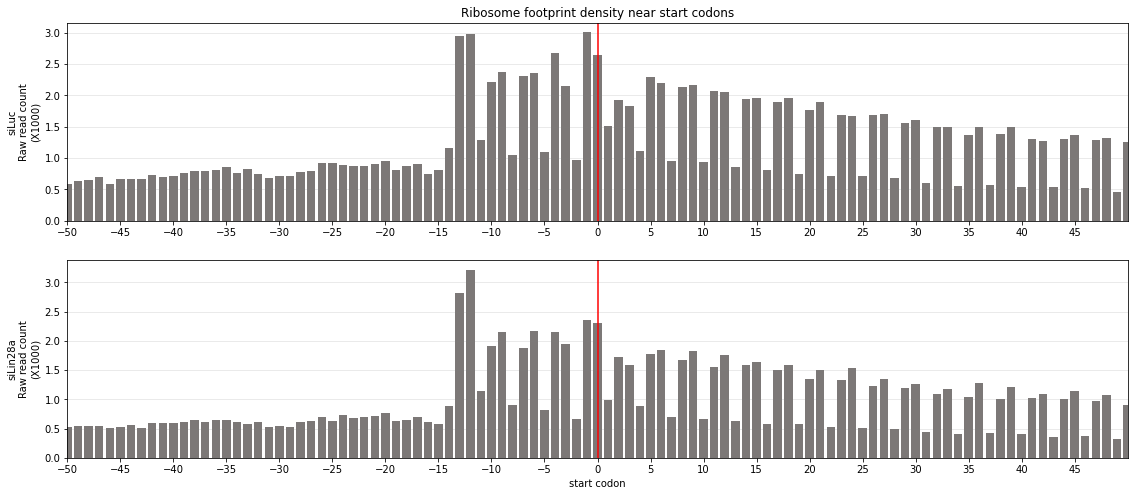

In [10]:
# plot ribosome footprint density near start codons

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 1, figsize=(19,8))

ax1 = axes[0]
ax1.bar(relpos_count_siLuc.keys(), relpos_count_siLuc.values(), color='#7C7877')
ax1.set_xlim(-50, 50)
ax1.set_xticks(np.arange(-50, 50, step=5))
ax1.set_ylabel('siLuc\nRaw read count\n(X1000)')
ax1.set_title('Ribosome footprint density near start codons')
ax1.axvline(x=0, color='red')
ax1.grid(axis='y', color='gray', alpha=0.2)

ax2 = axes[1]
ax2.bar(relpos_count_siLin28a.keys(), relpos_count_siLin28a.values(), color='#7C7877')
ax2.set_xlim(-50, 50)
ax2.set_xticks(np.arange(-50, 50, step=5))
ax2.set_xlabel('start codon')
ax2.set_ylabel('siLin28a\nRaw read count\n(X1000)')
ax2.axvline(x=0, color='red')
ax2.grid(axis='y', color='gray', alpha=0.2)